# Layers Knowledge Visualisation

This notebook content is a partial adaptation in [PyTorch](https://pytorch.org/) of [Visualizing what convnets learn](http://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb) notebook.

## Import Dependencies

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# PyTorch dependencies
import torchvision.models as models
import json

# Libraries are one level up within the components folder
import sys
sys.path.append('../components/')

# Custom components
from layer_inspector import LayerInspector
from layer_visualizer import LayerVisualizer

## Convnets Knowledge

It is often said that deep learning models are "black boxes", learning representations that are difficult to extract and present in a human-readable form. While this is partially true for certain types of deep learning models, it is definitely not true for convnets. The representations learned by convnets are highly amenable to visualization, in large part because they are representations of visual concepts. Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. We will show two of the most accessible and useful ones:

* Visualizing intermediate convnet outputs ("intermediate activations"). This is useful to understand how successive convnet layers transform their input, and to get a first idea of the meaning of individual convnet filters.
* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.

### ImageNet Datset

[ImageNet](http://image-net.org/) contains 1.4 million labeled images and 1000 different classes. Below is a sample of the images.

![alt text](../images/imagenet.jpg "ImageNet Dataset")

Following is a list with the 10 first classes.

In [2]:
class_index = json.load(open("../imagenet_class_index.json"))
print([class_index[imagenet_class][1] for imagenet_class in list(class_index.keys())[:10]])

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich']


### VGG Architectures

For the two methods, we will use the VGG11 model, which is the smaller version of VGG architectures developed by [Karen Simonyan and Andrew Zisserman](https://arxiv.org/pdf/1409.1556.pdf) in 2014, a simple and widely used convnet architecture. The input of the network is an image of shape (224x224). It has 133 millions of parameters and it is available in [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html) PyTorch's module. Below is the architecture of the VGG16 model which is slightly bigger than VGG11.

![alt text](../images/vgg16.png "VGG16 Architecture")

You can construct a model with random parameters by calling its constructor, we can see it has two well differentiated parts, the feature extractor part (convolutional base) and the classifier one which last layer output is a vector of 1000 units which match with the number of classes of ImageNet dataset.

As it is initialized with random parameters we can say it is in its "Initial State".

In [3]:
model = models.vgg11()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

### Initial State Layers Inspection

In order to extract the intermediate feature maps of the model we have to inspect its layers (intercept their forward and backward outputs) during inference.

A custom component has been developed to intercept the outputs of a list of selected layers. We will be inspecting all "MaxPool2d" intermediate layers in the model that are in the convolutional base part.

In [4]:
layers = [model.features[2], model.features[5], model.features[10], model.features[15], model.features[20]]
layer_inspector = LayerInspector(model, layers)

We are going to predict the image class below that shows two African Elephants and display the intermediate outputs.

<center><img src="../images/creative_commons_elephant.jpg" alt="drawing" width="600"/></center>

The top-5 classes predicted for this image are:

In [5]:
img_path = '../images/creative_commons_elephant.jpg'
layer_inspector.predict(img_path, class_index)

790 shopping_basket 0.24113911
510 container_ship 0.18671843
979 valley 0.17588593
34 leatherback_turtle 0.16587539
33 loggerhead 0.16207924


Thus our network has recognized our image as containing an undetermined quantity of shopping basket,with a probability of ~0.24%, obviously the model is in its "Initial State" and knows nothing or very little about the label (class) of the image.

### Visualizing intermediate activations

Visualizing intermediate activations consists in displaying the feature maps that are output by various intermediate layers in a network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives a view into how an input is decomposed unto the different filters learned by the network. These feature maps we want to visualize have 3 dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel, as a 2D image.

Only the two first selected layers will be shown due to the amount of channels per layer and because are the ones with higher resolution (width and height) allowing a more comprensible visualization, but we encorage the reader to change the num_layers parameter to display more layers or simply omitting it to display all inspected layers.

Two types of visualization are presented, one respect to the input (forward outputs/activations) and another with respect to the label (forward outputs/activations proportional to the mean backward outputs/activations).

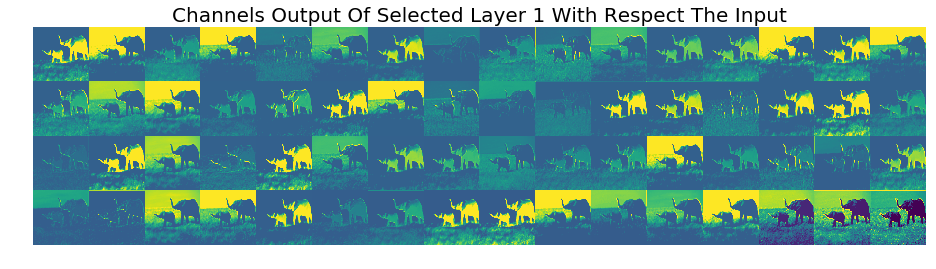

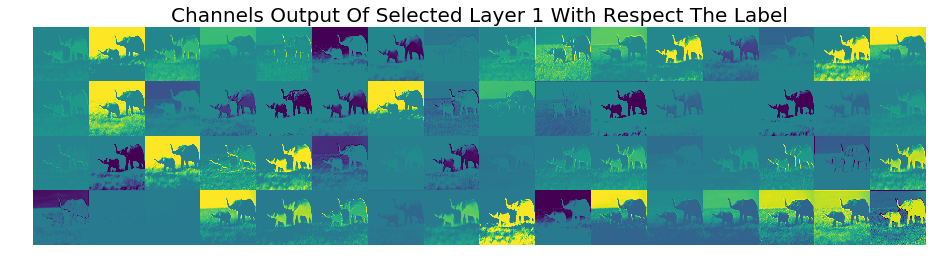

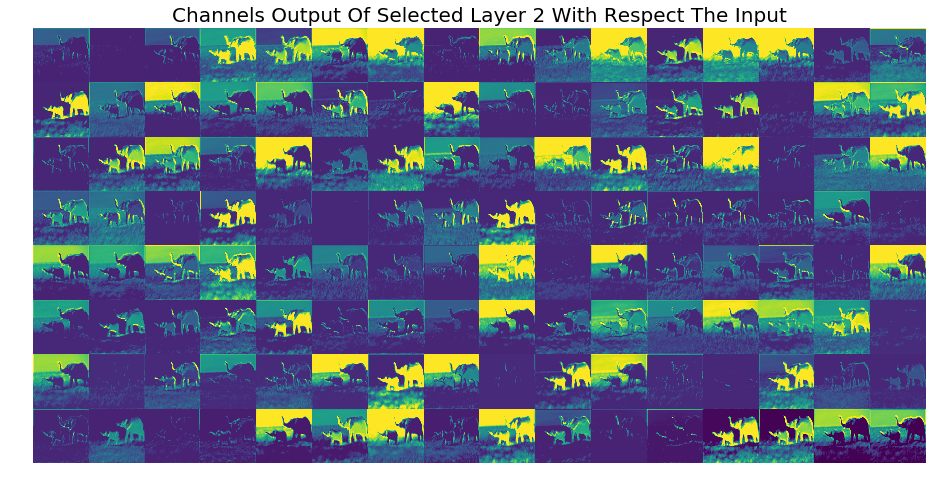

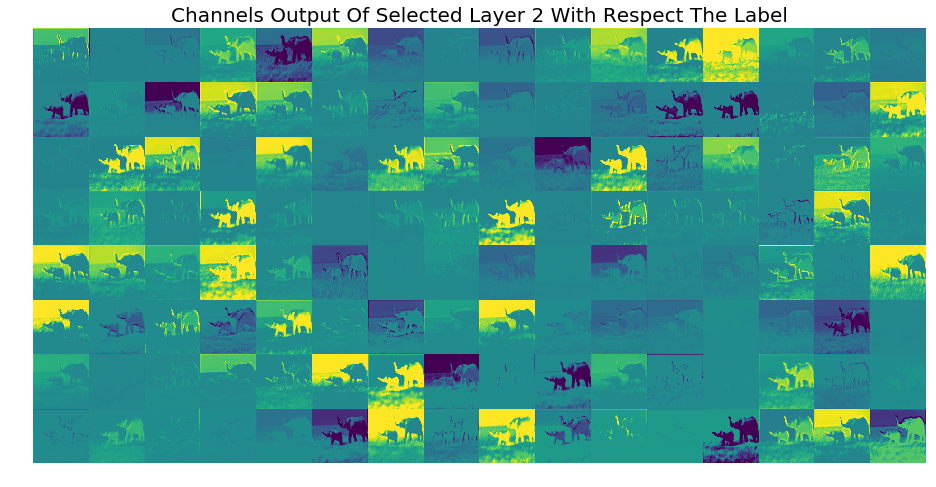

In [6]:
layer_visualizer = LayerVisualizer(layer_inspector.interceptors)
layer_visualizer.display_layers_intermediate_activations(num_layers=2)

A few remarkable things to note here:

* If you have decided to display all the layers you will have notice that the first layer acts as a collection of various edge detectors and as we go higher-up, the activations become increasingly abstract and less visually interpretable. They start encoding higher-level concepts such as "elephant ear" or "elephant eye".

* Higher-up presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.

* The sparsity of the activations is increasing with the depth of the layer: in the first layer, all filters are activated by the input image, but in the following layers more and more filters are blank. This means that the pattern encoded by the filter isn't found in the input image.

That was the theory for a proper trained model in its "Final State" but as the model in its "Initial State" the activations are either retaining almost all of the information present in the image or none information about the image label (class).

### Visualizing heatmaps of class activation

This general category of visualization is called "Class Activation Map" (CAM), and consists in producing heatmaps of "class activation" over input images. A "class activation" heatmap is a 2D grid of scores associated with an specific output class, computed for every location in any input image, indicating how important each location is with respect to the class considered.

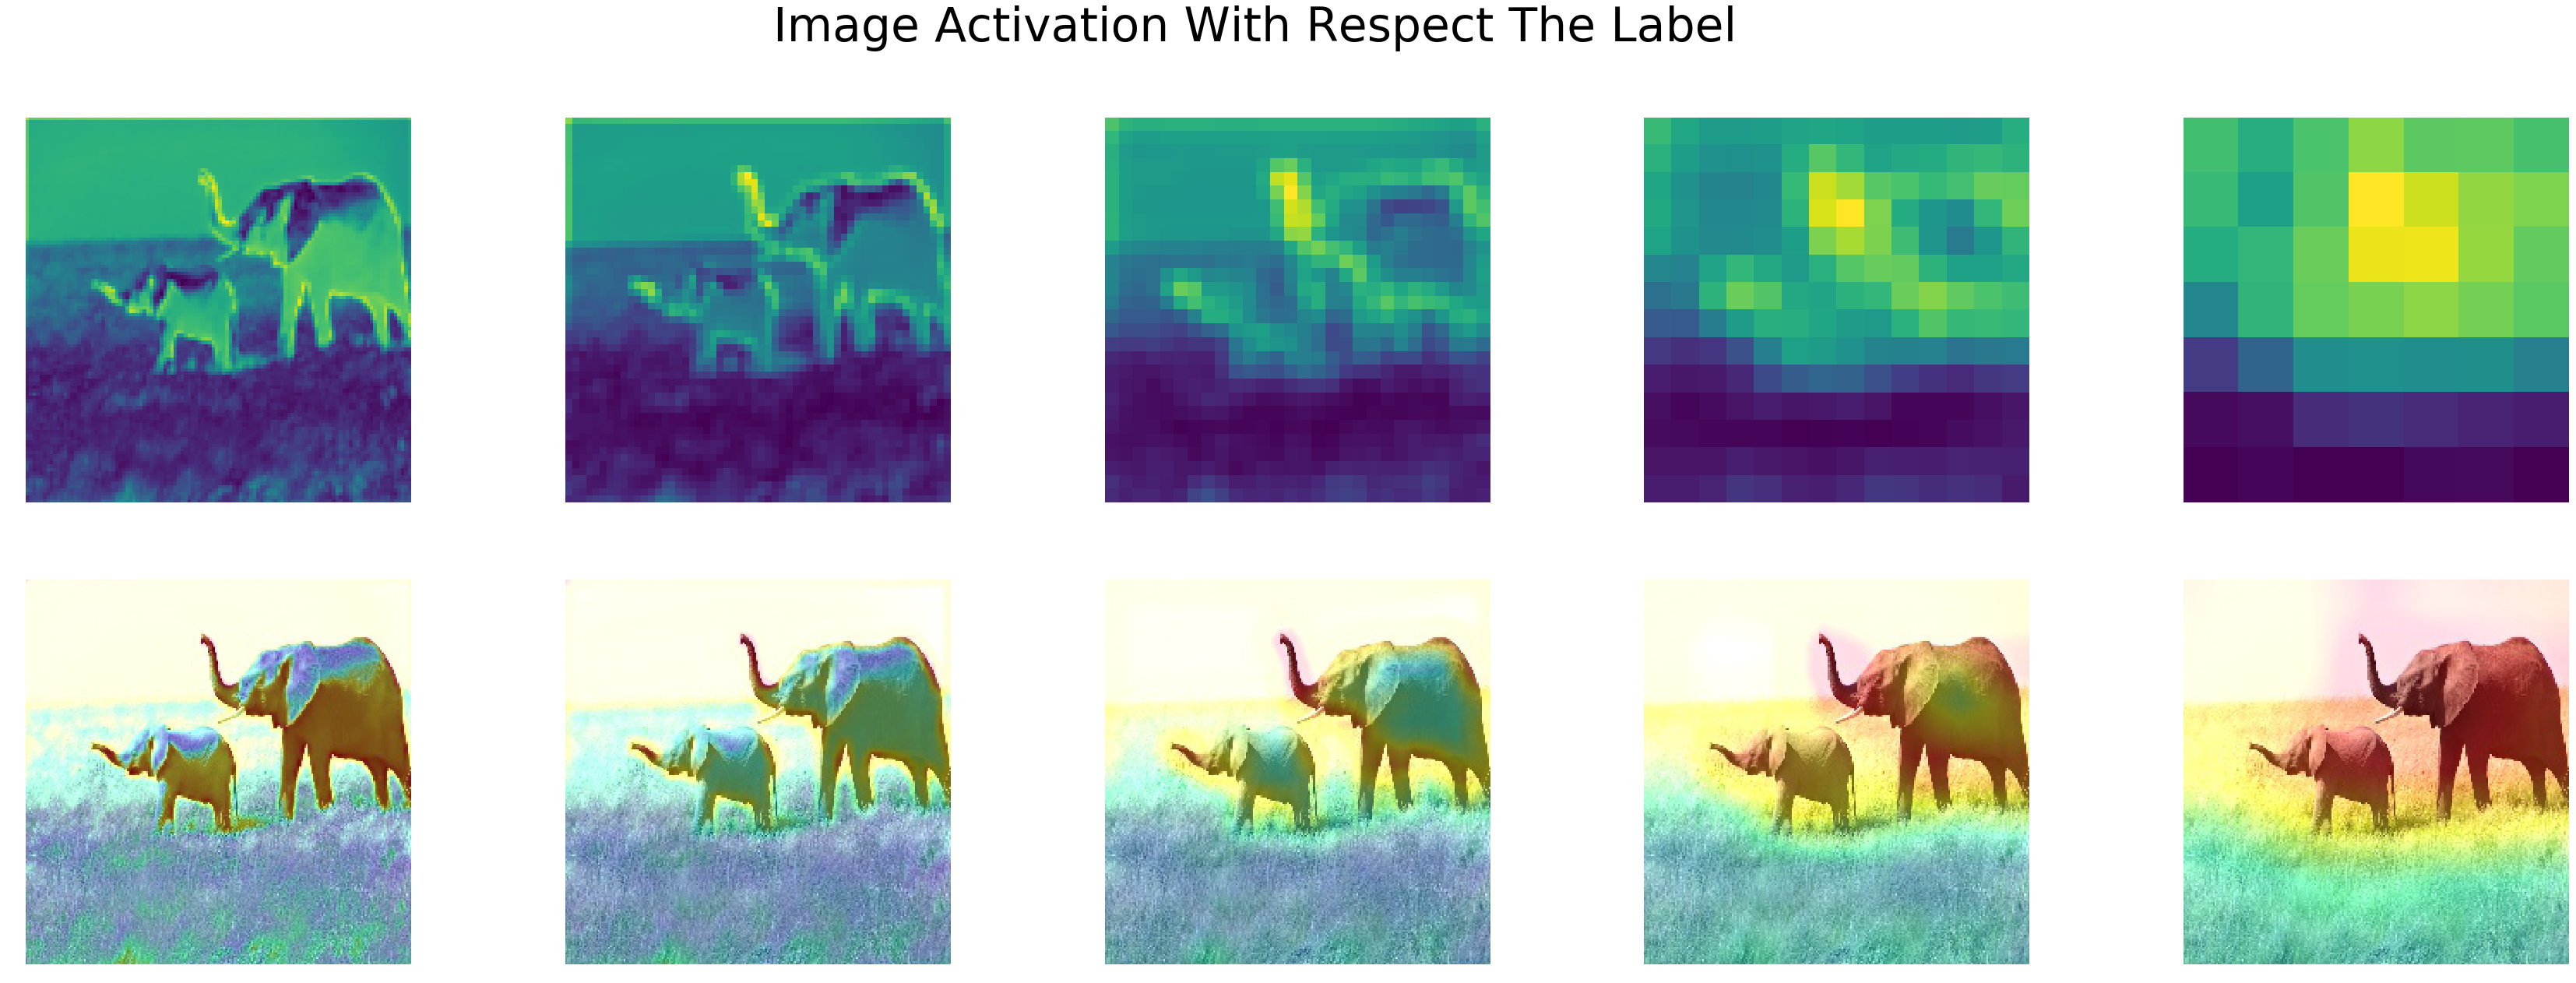

In [7]:
layer_visualizer.display_layers_label_activations(img_path)

We can see that the image is widely actived across all the layers, once again, because the model is in its "Initial State" and knows nothing about the class.

### Final State Layers Inspection

This time we are going to create the model pre-trained on ImageNet, that is, in its "Final State"

In [8]:
model = models.vgg11(pretrained=True)
layers = [model.features[2], model.features[5], model.features[10], model.features[15], model.features[20]]
layer_inspector = LayerInspector(model, layers)

The top-5 classes predicted this time for the image are:

In [9]:
layer_inspector.predict(img_path, class_index)

386 African_elephant 24.04192
101 tusker 22.241093
346 water_buffalo 19.044252
385 Indian_elephant 18.85834
343 warthog 17.113712


Thus our network has recognized our image as containing an undetermined quantity of african elephant,with a probability of ~0.24%, obviously the model is in its "Final State" and knows a lot about the label (class) of the image.

### Visualizing intermediate activations

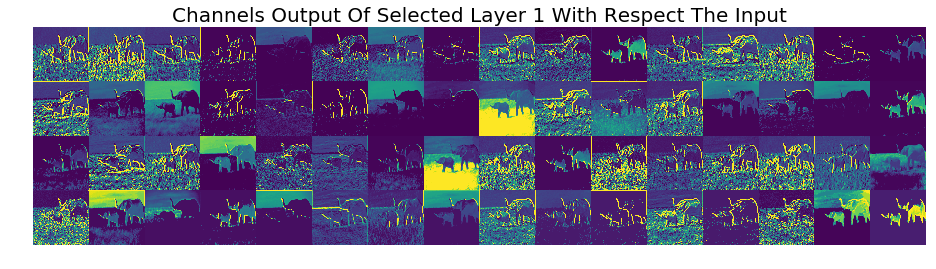

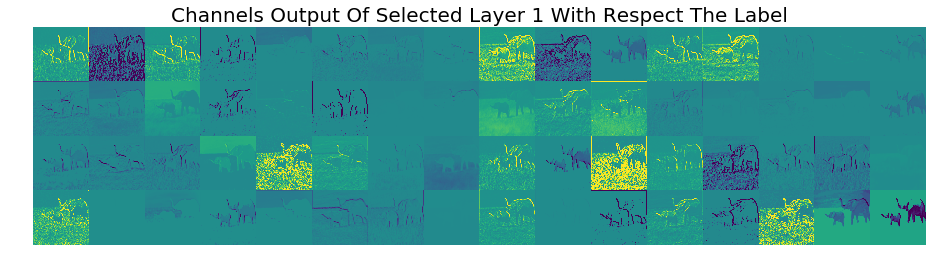

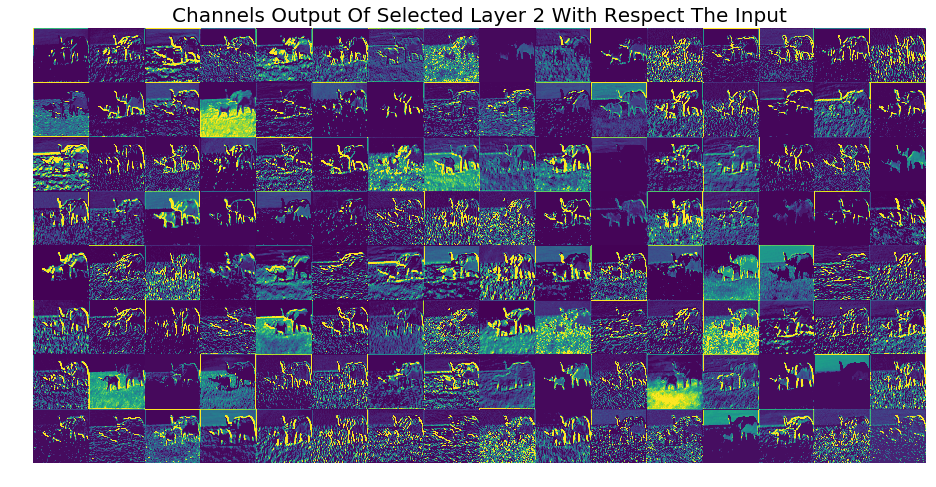

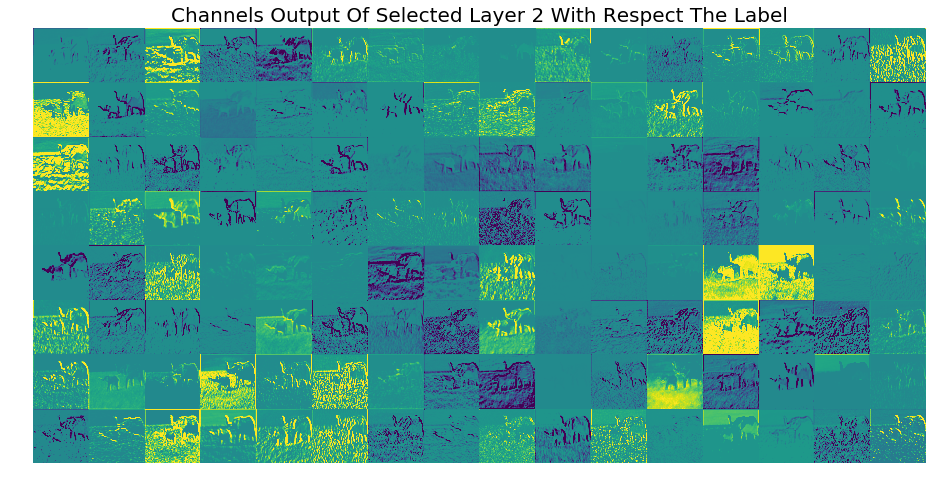

In [10]:
layer_visualizer = LayerVisualizer(layer_inspector.interceptors)
layer_visualizer.display_layers_intermediate_activations(num_layers=2)

This time as the model in its "Final State" we have just evidenced a very important universal characteristic of the representations learned by deep neural networks: the features extracted by a layer get increasingly abstract with the depth of the layer. 

The activations of layers higher-up carry less and less information about the specific input being seen, and more and more information about the target (in our case an African elephant). 

A deep neural network effectively acts as an information distillation pipeline, with raw data going in (in our case, RBG pictures), and getting repeatedly transformed so that irrelevant information gets filtered out (e.g. the specific visual appearance of the image) while useful information get magnified and refined (e.g. the class of the image).

### Visualizing heatmaps of class activation

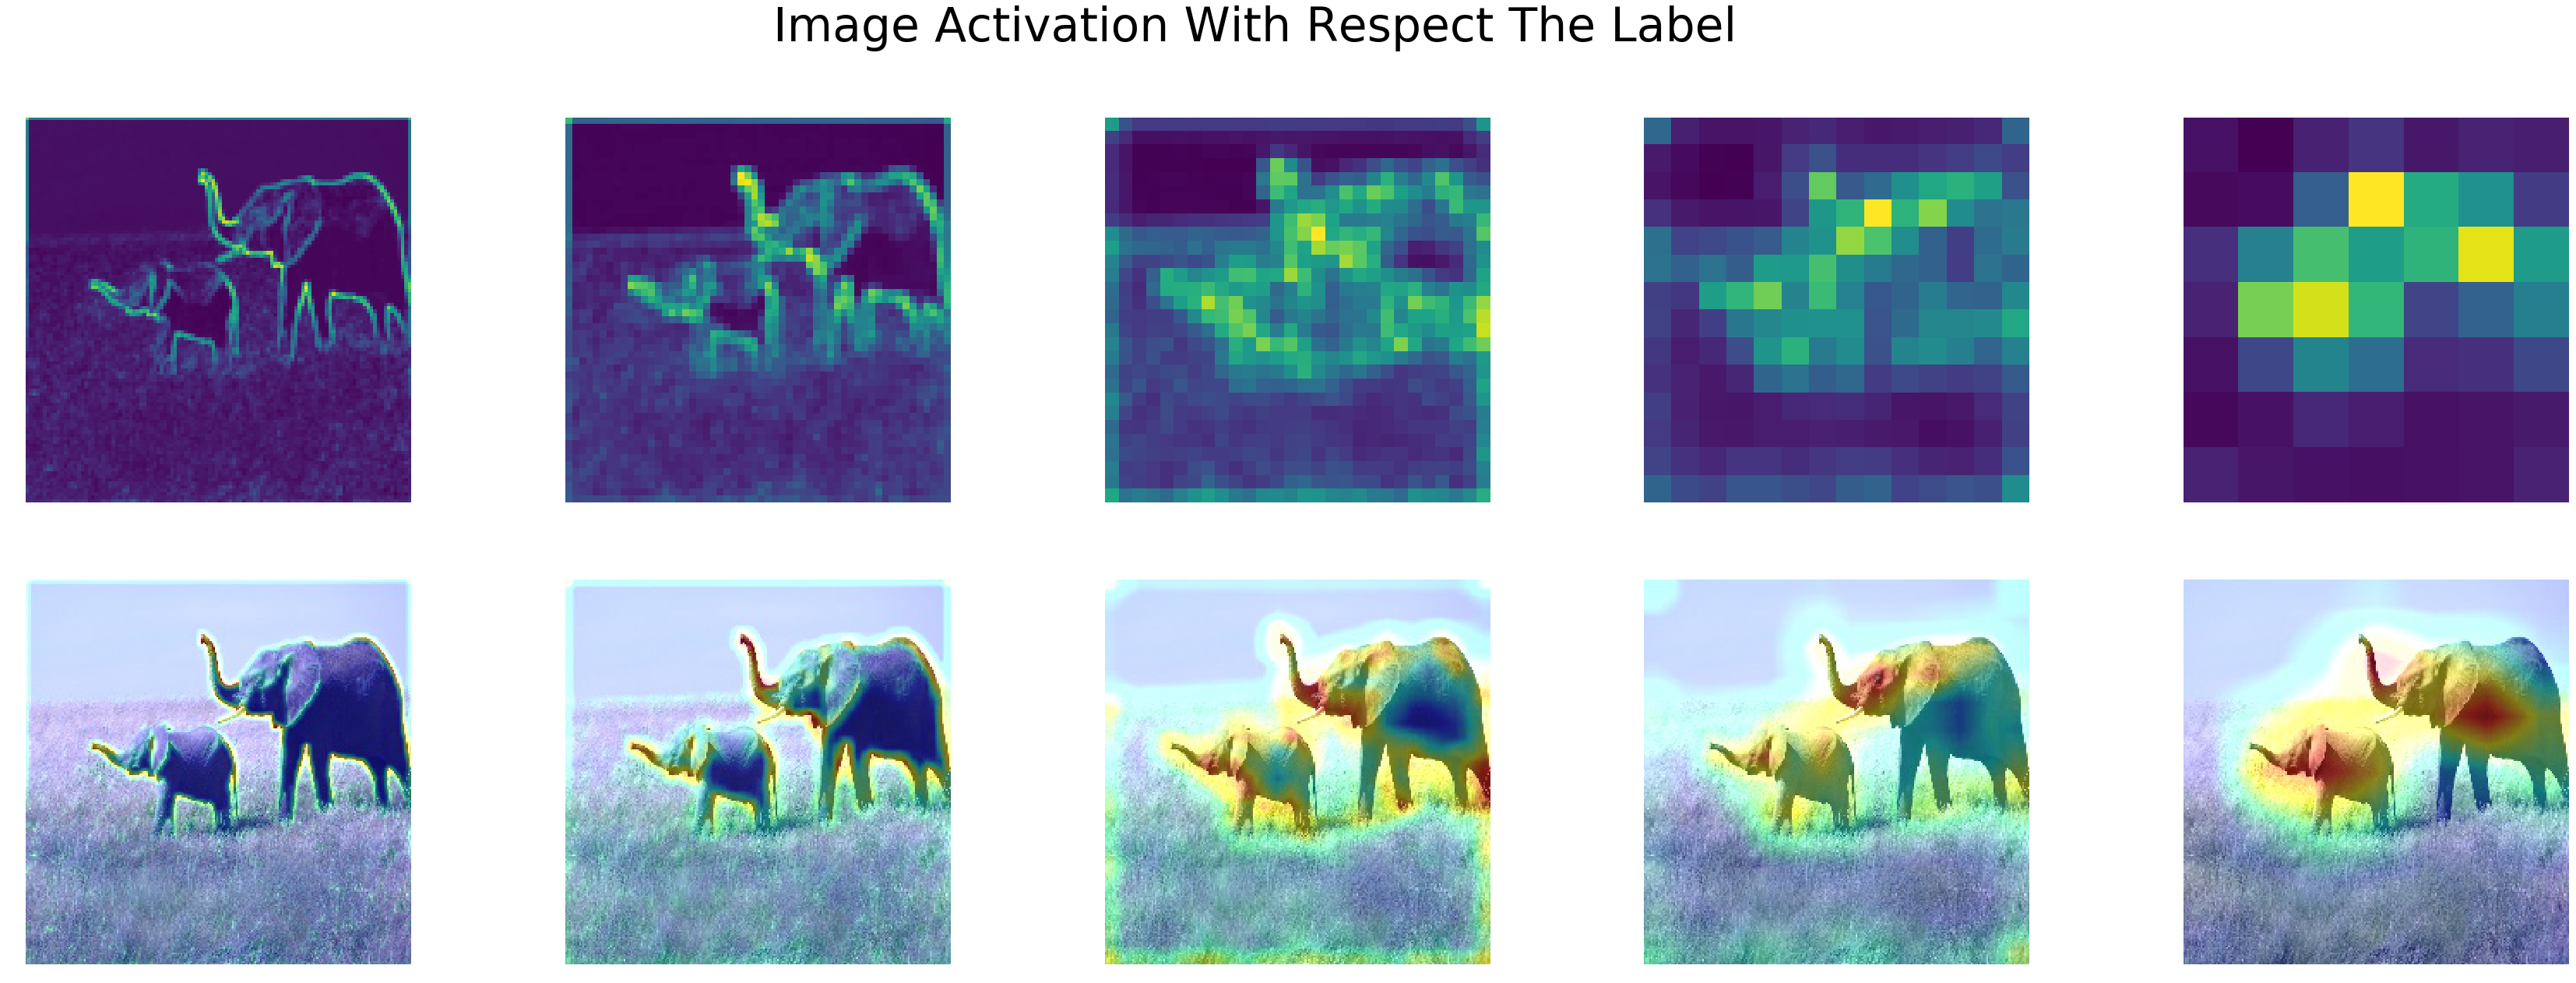

In [11]:
layer_visualizer.display_layers_label_activations(img_path)

This time as the model is in its "Final State", we can see that the activation are closely related to the image class allowing to answers two important questions:

1. Why did the network think this image contained an African elephant?

2. Where is the African elephant located in the picture?

In particular, it is interesting to note that in the last layer, the ears of the elephant cub are strongly activated, as well as the trunk and part of the body of the adult elephant: this is probably how the network can tell the difference between African and Indian elephants.